#  **MILEAGE PREDICTION**

 **Objective**: To predict the mileage of a given car based of various attributes such as number of cylinders in the engine, horsepower, weight, acceleration, etc.

**Data Source**: The data has been obtained from YBI Foundation github repository.

# IMPORT LIBRARIES

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# IMPORT DATA

In [36]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

# DESCRIBE DATA

In [37]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [38]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [39]:
data['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

# DATA VISUALISATION

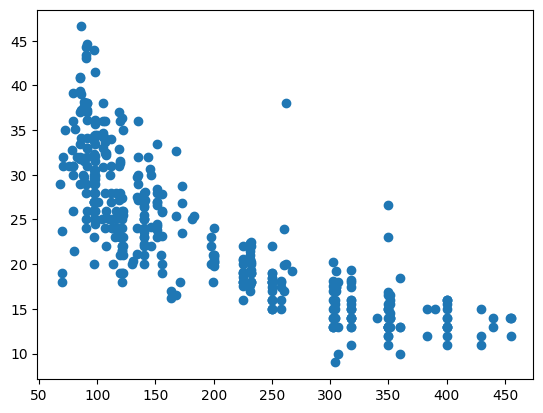

In [40]:
plt.scatter(data['displacement'],data['mpg'])

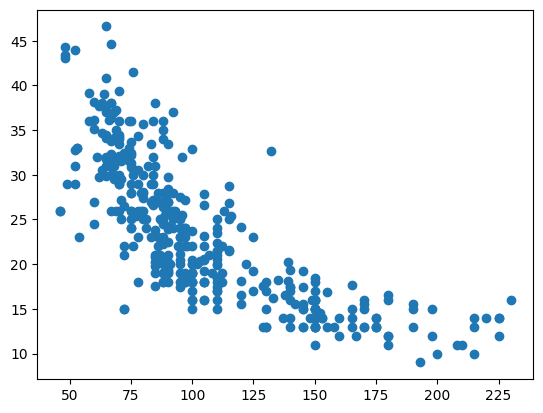

In [41]:
plt.scatter(data['horsepower'],data['mpg'])

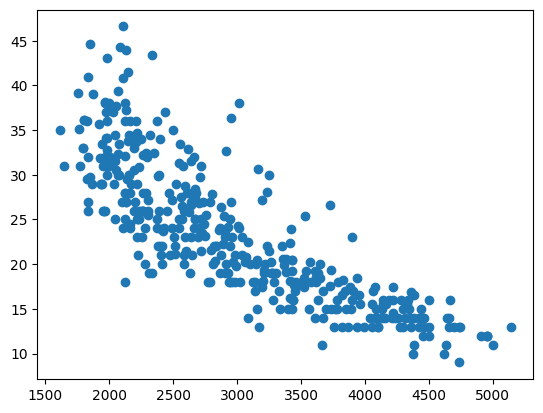

In [42]:
plt.scatter(data['weight'],data['mpg'])

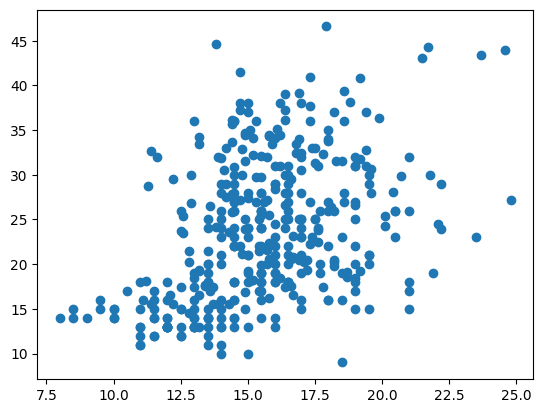

In [43]:
plt.scatter(data['acceleration'],data['mpg'])

# DATA PREPROCESSING

In [44]:
#the attribute name is removed as it is not useful in a linear model
data = data.drop(['name'],axis=1)

In [45]:
#the missing values in the attribute 'horsepower' are filled with the median values
#of the column
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

In [46]:
#the name of origin countries is replaced by integers
data.replace({'origin':{'usa':0,'japan':1,'europe':2}},inplace=True)

/tmp/ipykernel_33/3390080255.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'origin':{'usa':0,'japan':1,'europe':2}},inplace=True)


# DEFINE TARGET VARIABLE(y) AND FEATURE VARIABLES(X)

In [47]:
X = data.drop(['mpg'],axis=1)
y = data['mpg']

# TRAIN TEST SPLIT

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=2529)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 7), (120, 7), (278,), (120,))

# MODELING

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
model.coef_

array([-0.7200078 ,  0.02547056, -0.00848965, -0.00727921,  0.02231962,
        0.78626808,  1.4880235 ])

# PREDICTION

In [53]:
y_pred = model.predict(X_test)

# MODEL EVALUATION

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [55]:
mean_squared_error(y_pred,y_test)

13.738632247497424

In [56]:
mean_absolute_error(y_pred,y_test)

2.891694878520394

In [57]:
mean_absolute_percentage_error(y_pred,y_test)

0.14032328952601075

# EXPLAINATION

In this project we are trying to predict the mileage of a car based to various features of it. We get the dataset and process it to get rid of unwanted features and to fill null values. After processing the dataset we define the features and labels of the dataset. These are then split into training and testing data. As the value of mileage is continuous we are using a linear model in this case. The training data is used to train a linear regression model and find the best fit for the data. This model is then tested on the test data. The predictions are made and evaluated to check the error. Here we can observe that the model has an accuracy of 86%. We have successfully built a machine learning model to predict the mileage of a car using its features.